# DATA260P Project 2: Bin Packing Algorithms

#### Connor McManigal and Aaron Mui

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
df = pd.read_csv("binpacking_results.csv")

# Alter algorithm naming convention
def format_string(string_value):
    parts = string_value.strip("()").replace("'", "").split(", ")
    return parts[0] + parts[1]

df['Algorithm'] = df['Algos'].apply(format_string)
df2 = df.drop('Algos', axis=1)

# Function for plotting
def plottype(df, algo, type, axes, inits=5):
    for i in range(inits):
        df_f = df[df['Algorithm'] == f'{algo}{i}']
        axes.plot(np.log(df_f['Data Size']), np.log(df_f[type]), label=f'Run {i + 1}')
    axes.legend()
    axes.grid()    
    axes.set_xticks(np.log(df_f['Data Size']))
    axes.set_title(f'{algo} {type}')
    axes.set_xlabel('Log Data Size')
    axes.set_ylabel(f'Log {type}')

## NextFit

#### Descriptive Statistics

In [26]:
nextfit = df2[df2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
mean_nf = nextfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_nf = mean_nf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_nf)

            Mean Waste  Mean Runtime
Data Size                           
100          14.229911      0.000024
200          28.558679      0.000043
400          56.627807      0.000083
800         115.816490      0.000176
1600        233.217887      0.000394
3200        458.747150      0.000718
6400        928.486310      0.001579
12800      1842.777196      0.003148
25600      3691.390597      0.006346


#### Plotting Waste and Runtime on Log-Log Scale

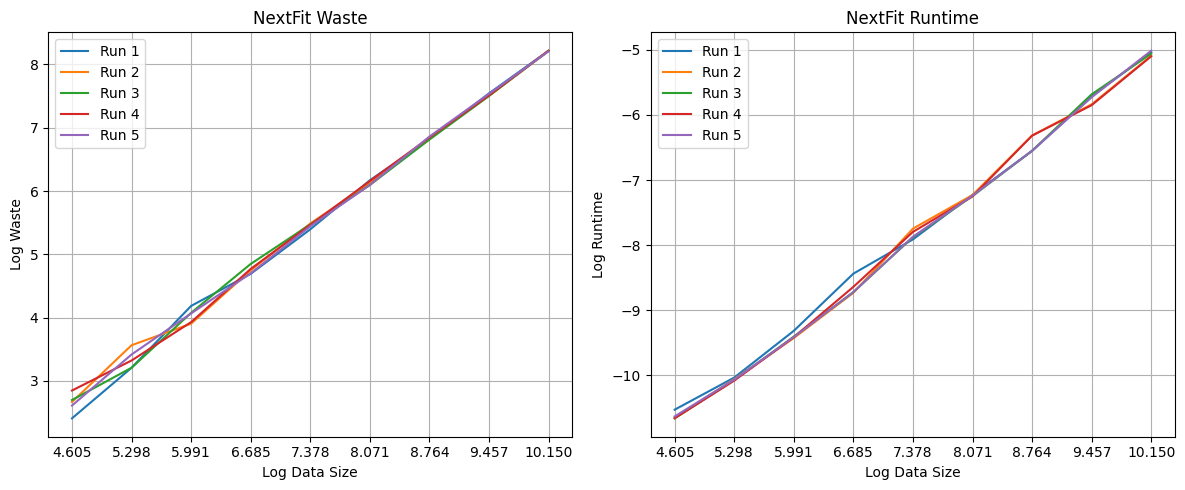

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plottype(df2, 'NextFit', 'Waste', axes[0])
plottype(df2, 'NextFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [28]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
nf_waste = np.array([14.229911, 28.558679, 56.627807, 115.816490, 233.217887, 458.747150, 928.486310, 1842.777196, 3691.390597])
log_data_sizes = np.log(data_sizes)
log_nf_waste = np.log(nf_waste)
X = sm.add_constant(log_data_sizes)

model_nf = sm.OLS(log_nf_waste, X).fit()
print("Coefficients for NF:", model_nf.params)

Coefficients for NF: [-1.96037817  1.00280427]


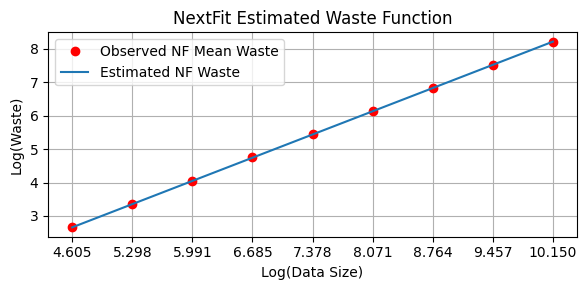

In [29]:
plt.figure(figsize=(6, 3))
plt.plot(log_data_sizes, log_nf_waste, 'ro', label = 'Observed NF Mean Waste')
plt.plot(log_data_sizes, model_nf.fittedvalues, '-', label = 'Estimated NF Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('NextFit Estimated Waste Function')
plt.tight_layout()
plt.grid()
plt.show()

#### NextFit Results Diagnosis

**NF Estimated Waste Function of n**: 
- $Log(NFWaste) = -1.9604 + 1.0028 log(n)$
- OR exponentiated: $NFWaste = 0.140 n^{1.0028}$

**Estimated Big-O Runtime**:

# TODO!

**Results**:

Since NextFit follows the simplest bin packing strategy, it makes sense that the runtimes are fast and the waste performances are mediocre. Across the five trials, NextFit performed with lightning fast speed, only taking a few milliseconds to run across all data sizes and waste stayed relatively consistent. This simplicity and efficiency comes at the cost of poor waste performance. NextFit's estimated waste function almost perfectly predicts the observed mean waste across the varying dataset sizes. It should be noted that the estimated waste function's slope of 1.0028 is the highest across all of the other algorithms, thus confirming its poor waste generation. As expected, NextFit is our fastest performing bin packing algorithm but our worst performer in terms of waste.

## FirstFit

#### Descriptive Statistics

In [30]:
firstfit = df2[df2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
mean_ff = firstfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ff = mean_ff.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ff)

           Mean Waste  Mean Runtime
Data Size                          
100          4.429911      0.000118
200          6.758679      0.000369
400          8.427807      0.001352
800         14.016490      0.005294
1600        20.817887      0.021371
3200        36.147150      0.089400
6400        59.486310      0.365422
12800      109.577196      1.474273
25600      209.190597      5.883045


#### Plotting Waste and Runtime on Log-Log Scale

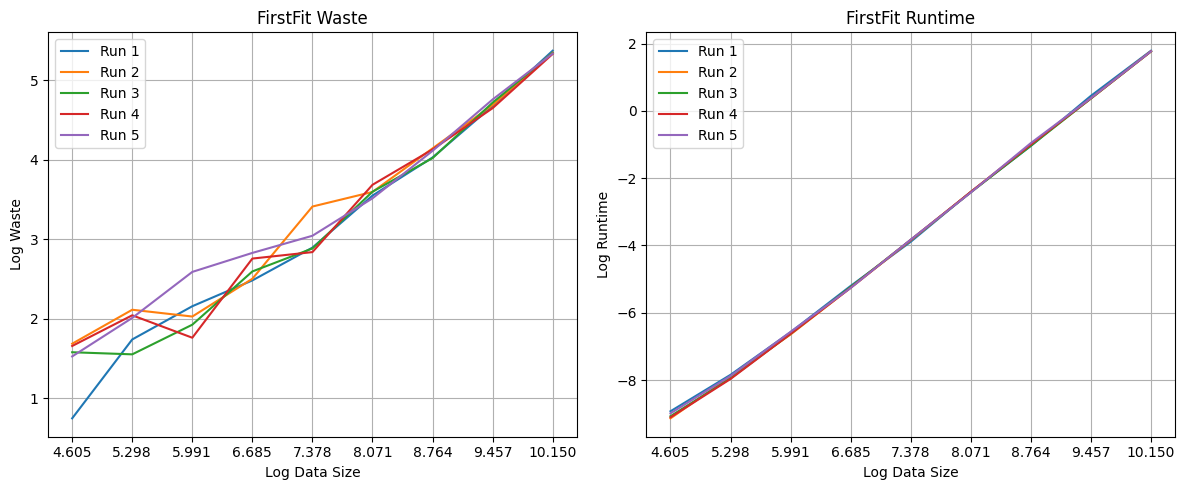

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plottype(df2, 'FirstFit', 'Waste', axes[0])
plottype(df2, 'FirstFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [32]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
ff_waste = np.array([4.429911, 6.758679, 8.427807, 14.016490, 20.817887, 36.147150, 59.486310, 109.577196, 209.190597])
log_data_sizes = np.log(data_sizes)
log_ff_waste = np.log(ff_waste)
X = sm.add_constant(log_data_sizes)

model_ff = sm.OLS(log_ff_waste, X).fit()
print("Coefficients for FF:", model_ff.params)

Coefficients for FF: [-1.86602966  0.68846979]


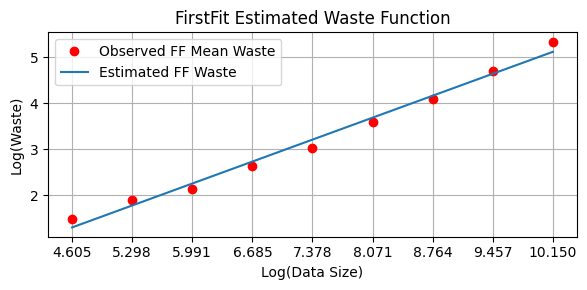

In [33]:
plt.figure(figsize=(6, 3))
plt.plot(log_data_sizes, log_ff_waste, 'ro', label = 'Observed FF Mean Waste')
plt.plot(log_data_sizes, model_ff.fittedvalues, '-', label = 'Estimated FF Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('FirstFit Estimated Waste Function')
plt.tight_layout()
plt.grid()
plt.show()

#### FirstFit Results Diagnosis

**Estimated Waste Function of n**: 
- $Log(FFWaste) = -1.866 + 0.6884 log(n)$
- OR exponentiated: $FFWaste = 0.1547 n^{0.6884}$

**Estimated Big-O Runtime**:

# TODO!

**Results**:

FirstFit performed reasonably well in terms of both runtime and waste generation. As expected with a more complicated bin packing strategy, waste would be substantially better but the cost would be slower runtimes. Across the five trials, waste performance fluctuated to some degree, but eventually converged as data sizes got larger. Runtimes stayed very similar across the trials, following a linear trend in the log-log plot. Compared to NextFit, smaller sized data ran almost as fast, but as data sizes increased runtimes got much larger(taking seconds versus milliseconds). While creating the waste equation for FirstFit in regard to data size n, we see a small slope of 0.64884, which indicates the significant waste improvements made when compared to NextFit's slope of 1.0028. Although the estimated waste function does not perfectly predict the observed mean waste performances, the estimated model does a sufficient job at modeling its relationship. Relative to the other algorithms, FirstFit possesses some degree of balance between satisfactory waste generation and decent runtimes.

## BestFit

#### Descriptive Statistics

In [34]:
bestfit = df2[df2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
mean_bf = bestfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bf = mean_bf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bf)

           Mean Waste  Mean Runtime
Data Size                          
100          3.629911      0.000338
200          4.558679      0.001171
400          6.427807      0.004331
800          9.216490      0.016818
1600        15.817887      0.067538
3200        25.747150      0.271404
6400        45.286310      1.083424
12800       80.377196      4.343436
25600      153.590597     17.311385


#### Plotting Waste and Runtime on Log-Log Scale

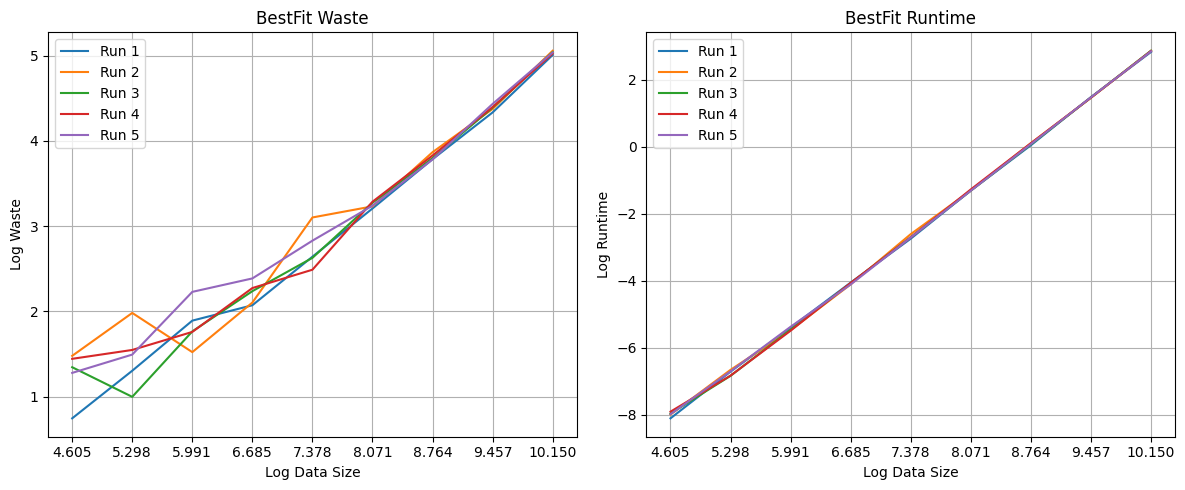

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plottype(df2, 'BestFit', 'Waste', axes[0])
plottype(df2, 'BestFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [36]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
bf_waste = np.array([3.629911, 4.558679, 6.427807, 9.216490, 15.817887, 25.747150, 45.286310, 80.377196, 153.590597])
log_data_sizes = np.log(data_sizes)
log_bf_waste = np.log(bf_waste)
X = sm.add_constant(log_data_sizes)

model_bf = sm.OLS(log_bf_waste, X).fit()
print("Coefficients for BF:", model_bf.params)

Coefficients for BF: [-2.15616044  0.68579699]


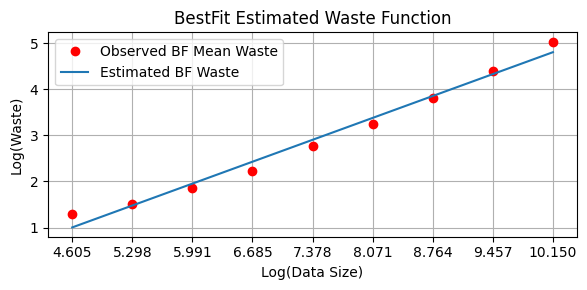

In [37]:
plt.figure(figsize=(6, 3))
plt.plot(log_data_sizes, log_bf_waste, 'ro', label = 'Observed BF Mean Waste')
plt.plot(log_data_sizes, model_bf.fittedvalues, '-', label = 'Estimated BF Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('BestFit Estimated Waste Function')
plt.tight_layout()
plt.grid()
plt.show()

#### BestFit Results Diagnosis

**Estimated Waste Function of n**: 
- $Log(BFWaste) = -2.156 + 0.68579 log(n)$
- OR exponentiated: $BFWaste = 0.11578 n^{0.68579}$

**Estimated Big-O Runtime**:

# TODO!

**Results**:

In respect to waste, BestFit performed better than FirstFit and NextFit, but as a part of the tradeoff, it had much longer runtimes. BestFit's slower runtimes are noticeably worse than FirstFit's and far worse than NextFit's. The estimated waste equations of BestFit and FirstFit have very similar slopes ~0.68, which goes to show somewhat similar waste performance, however, comparing across all data sizes, BestFit did perform better at each size. The estimated waste function also does a good job of accurately modeling the mean waste performances at each data size. Across the five trials, BestFit's observed waste values fluctuated to some degree until larger data sizes where they eventually converged. Similar to FF, BF's observed runtimes are strictly linear in the log-log scaled plot above. While BestFit provides adequate waste levels, even without sorting, its runtime performance suffers as a consequence.

## FirstFit Decreasing

#### Descriptive Statistics

In [38]:
firstfitdec = df2[df2['Algorithm'].str.contains('FirstFitDec0|FirstFitDec1|FirstFitDec2|FirstFitDec3|FirstFitDec4')]
mean_ffd = firstfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ffd = mean_ffd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ffd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000255
200          1.558679      0.000715
400          1.027807      0.002281
800          1.016490      0.007938
1600         1.017887      0.029426
3200         1.547150      0.116396
6400         1.886310      0.455405
12800        1.977196      1.829690
25600        2.190597      7.432171


#### Plotting Waste and Runtime on Log-Log Scale

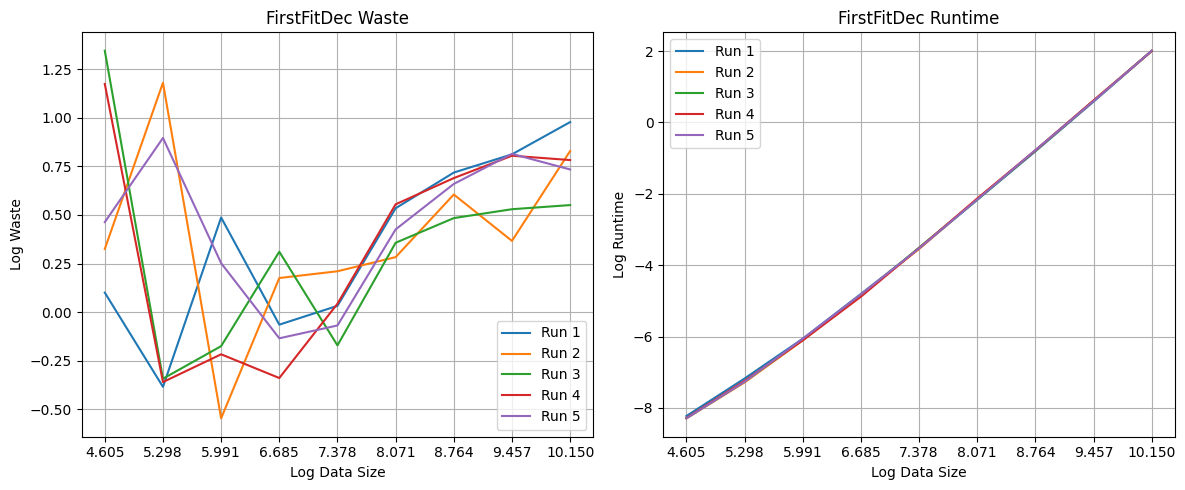

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plottype(df2, 'FirstFitDec', 'Waste', axes[0])
plottype(df2, 'FirstFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [40]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
ffd_waste = np.array([2.229911, 1.558679, 1.027807, 1.016490, 1.017887, 1.547150, 1.886310, 1.977196, 2.190597])
truncated_data = data_sizes[3:]
truncated_waste = ffd_waste[3:]
log_data_sizes = np.log(data_sizes)
log_trunc_data = np.log(truncated_data)
log_ffd_waste = np.log(ffd_waste)
log_trunc_ffd_waste = np.log(truncated_waste)
X = sm.add_constant(log_data_sizes)
X_trunc = sm.add_constant(log_trunc_data)

model_ffd = sm.OLS(log_ffd_waste, X).fit()
trunc_model_ffd = sm.OLS(log_trunc_ffd_waste, X_trunc).fit()
print("Coefficients for FFD:", model_ffd.params)
print("Coefficients for FFD Truncated:", trunc_model_ffd.params)

Coefficients for FFD: [0.02323089 0.054746  ]
Coefficients for FFD Truncated: [-1.66342327  0.24852084]


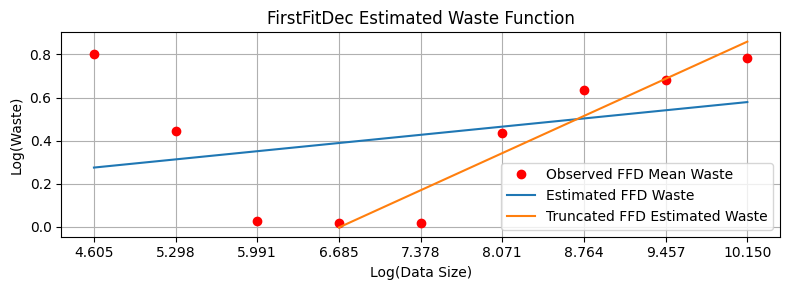

In [41]:
plt.figure(figsize=(8, 3))
plt.plot(log_data_sizes, log_ffd_waste, 'ro', label = 'Observed FFD Mean Waste')
plt.plot(log_data_sizes, model_ffd.fittedvalues, '-', label = 'Estimated FFD Waste')
plt.plot(log_trunc_data, trunc_model_ffd.fittedvalues, '-', label = 'Truncated FFD Estimated Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('FirstFitDec Estimated Waste Function')
plt.tight_layout()
plt.grid()
plt.show()

#### FirstFit Decreasing Results Diagnosis

**Full Estimated Waste Function of n**: 
- $Log(FFDWaste) = 0.0232 + 0.0547 log(n)$
- OR exponentiated: $FFDWaste = 1.023 n^{0.0547}$

**Truncated Estimated Waste Function of n**: 
- $Log(FFDWaste) = -1.6634 + 0.2485 log(n)$
- OR exponentiated: $FFDWaste = 0.18949 n^{0.2485}$


**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## BestFit Decreasing

#### Descriptive Statistics

In [42]:
bestfitdec = df2[df2['Algorithm'].str.contains('BestFitDec0|BestFitDec1|BestFitDec2|BestFitDec3|BestFitDec4')]
mean_bfd = bestfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bfd = mean_bfd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bfd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000568
200          1.558679      0.001883
400          0.827807      0.006641
800          1.016490      0.025631
1600         1.017887      0.100216
3200         1.547150      0.403246
6400         1.886310      1.615202
12800        1.977196      6.402005
25600        2.190597     25.428774


#### Plotting Waste and Runtime on Log-Log Scale

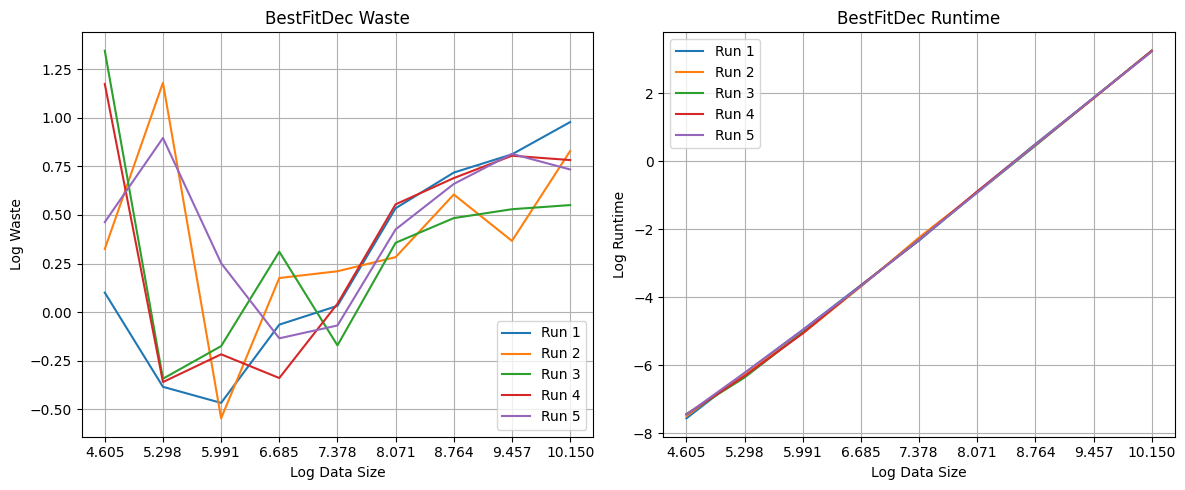

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plottype(df2, 'BestFitDec', 'Waste', axes[0])
plottype(df2, 'BestFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [44]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
bfd_waste = np.array([2.229911, 1.558679, 0.827807, 1.016490, 1.017887, 1.547150, 1.886310, 1.977196, 2.190597])
truncated_data = data_sizes[3:]
truncated_waste = bfd_waste[3:]
log_data_sizes = np.log(data_sizes)
log_trunc_data = np.log(truncated_data)
log_bfd_waste = np.log(bfd_waste)
log_trunc_bfd_waste = np.log(truncated_waste)
X = sm.add_constant(log_data_sizes)
X_trunc = sm.add_constant(log_trunc_data)

model_bfd = sm.OLS(log_bfd_waste, X).fit()
trunc_model_bfd = sm.OLS(log_trunc_bfd_waste, X_trunc).fit()
print("Coefficients for BFD:", model_bfd.params)
print("Coefficients for BFD Truncated:", trunc_model_bfd.params)

Coefficients for BFD: [-0.07759247  0.06515277]
Coefficients for BFD Truncated: [-1.66342327  0.24852084]


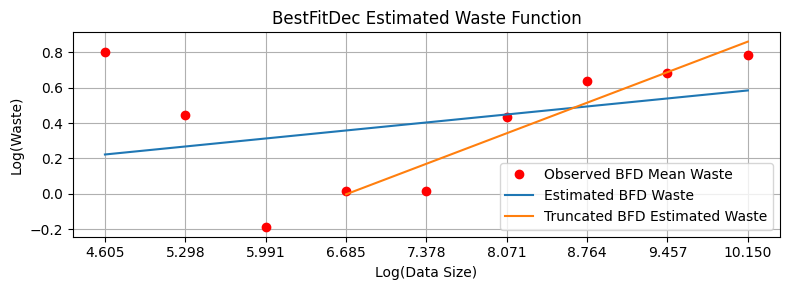

In [45]:
plt.figure(figsize=(8, 3))
plt.plot(log_data_sizes, log_bfd_waste, 'ro', label = 'Observed BFD Mean Waste')
plt.plot(log_data_sizes, model_bfd.fittedvalues, '-', label = 'Estimated BFD Waste')
plt.plot(log_trunc_data, trunc_model_bfd.fittedvalues, '-', label = 'Truncated BFD Estimated Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('BestFitDec Estimated Waste Function')
plt.tight_layout()
plt.grid()
plt.show()

#### BestFit Decreasing Results Diagnosis

**Full Estimated Waste Function of n**: 
- $Log(BFDWaste) = -0.07759 + 0.06515 log(n)$
- OR exponentiated: $BFDWaste = 0.9253 n^{0.06515}$

**Truncated Estimated Waste Function of n**: 
- $Log(BFDWaste) = -1.6634 + 0.2485 log(n)$
- OR exponentiated: $BFDWaste = 0.18949 n^{0.2485}$

**Estimated Big-O Runtime**:

# TODO!

**Results**:

# TODO!

## CustomFit1 & CustomFit1Sorted Vs. NextFit

(Connor)

#### Motivation:

I utilized a threshold based bin packing strategy in an effort to consistently minimize waste across the randomly generated data and to outperform the NextFit strategy. Instead of building off the strategies/heuristics that we learned about in class, I wanted to implement my own heuristic that would efficiently pack bins based off of remaining space available. While the heuristic I used is somewhat similar to first fit and best fit bin packing in that it considers remaining space, mine used a pre-determined threshold of 0.15 which ensured that items would only be packed into a bin if the remaining space was equal to or greater than the threshold value. 

#### Functionality and Explanation:

I developed two classes with the aim of improving the poor waste performance of next fit: one threshold bin packing algorithm without sorting(CustomFit1) and the other threshold bin packing algorithm with sorting(CustomSort1Sorted). What makes this custom fit algorithm unique is the pre-determined threshold value and the pack function. The pack function loops through the elements in the data, checks to see if the element fits in a bin, then checks if the space left in the bin is equal to or exceeds the threshold of 0.15, and finally decides whether to add that element to a bin where the threshold condition is met or create and add the element to a new bin. I decided to use a threshold of 0.15 because I felt that it would create a balance between maximizing space by allowing elements to be packed into bins with little room left over, while also preventing excessive waste. After running several iterations of the testing with different threshold values, I concluded that threshold values between 0.125 and 0.20 provided the best performances, but ~0.15 had the most consistent performance across all data sizes, so I stuck with that value.

Below are some descriptive statistics comparing both my threshold based bin packing algorithms(unsorted and sorted) to next fit performance. In addition, out of interest, I compared the sorted thresholding algorithm(CustomFit1Sorted) to first fit and best fit performances. This comparison goes to show how sorting the data before bin packing can drastically improve results and even perform better than first and best fit.

### Descriptive Statistics

In [46]:
cf1 = pd.read_csv("cf1_results.csv")
cf1['Algorithm'] = cf1['Algos'].apply(format_string)
cf1 = cf1.drop('Algos', axis=1)

In [47]:
# Stats on NextFit and Two CustomFit1 Variations(Unsorted vs. Sorted)
nf_results = cf1[cf1['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
nf_results = nf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
nf_results = nf_results.rename(columns={'Waste':'NF Mean Waste', 'Runtime':'NF Mean Runtime'})

cf1_results = cf1[cf1['Algorithm'].str.contains('CustomFit10|CustomFit11|CustomFit12|CustomFit13|CustomFit14')]
cf1_results = cf1_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf1_results = cf1_results.rename(columns={'Waste':'CF1 Mean Waste', 'Runtime':'CF1 Mean Runtime'})

cf1sorted_results = cf1[cf1['Algorithm'].str.contains('CustomFit1Sorted0|CustomFit1Sorted1|CustomFit1Sorted2|CustomFit1Sorted3|CustomFit1Sorted4')]
cf1sorted_results = cf1sorted_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf1sorted_results = cf1sorted_results.rename(columns={'Waste':'CF1 Sorted Mean Waste', 'Runtime':'CF1 Sorted Mean Runtime'})

merged_stats = nf_results.merge(cf1_results, on = 'Data Size').merge(cf1sorted_results, on = 'Data Size')
merged_stats = merged_stats[['NF Mean Waste', 'CF1 Mean Waste', 'CF1 Sorted Mean Waste', 'NF Mean Runtime', 'CF1 Mean Runtime', 'CF1 Sorted Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats)

           NF Mean Waste  CF1 Mean Waste  CF1 Sorted Mean Waste  NF Mean Runtime  CF1 Mean Runtime  CF1 Sorted Mean Runtime
Data Size                                                                                                                  
100            14.229911        5.029911               2.429911         0.000025          0.000258                 0.000413
200            28.558679        7.758679               2.358679         0.000051          0.001009                 0.001356
400            56.627807       12.627807               3.227807         0.000086          0.003929                 0.004885
800           115.816490       23.216490               5.016490         0.000171          0.015630                 0.018192
1600          233.217887       45.217887               8.217887         0.000389          0.063951                 0.071400
3200          458.747150       87.747150              13.347150         0.000779          0.265126                 0.285321
6400    

In [48]:
# Stats on CustomFit1Sorted vs. FF and BF
ff_results = cf1[cf1['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
ff_results = ff_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
ff_results = ff_results.rename(columns={'Waste':'FF Mean Waste', 'Runtime':'FF Mean Runtime'})

bf_results = cf1[cf1['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
bf_results = bf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
bf_results = bf_results.rename(columns={'Waste':'BF Mean Waste', 'Runtime':'BF Mean Runtime'})

merged_stats_cf1sorted = ff_results.merge(bf_results, on = 'Data Size').merge(cf1sorted_results, on = 'Data Size')
merged_stats_cf1sorted = merged_stats_cf1sorted[['FF Mean Waste', 'BF Mean Waste', 'CF1 Sorted Mean Waste', 'FF Mean Runtime', 'BF Mean Runtime', 'CF1 Sorted Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats_cf1sorted)

           FF Mean Waste  BF Mean Waste  CF1 Sorted Mean Waste  FF Mean Runtime  BF Mean Runtime  CF1 Sorted Mean Runtime
Data Size                                                                                                                
100             4.429911       3.629911               2.429911         0.000106         0.000356                 0.000413
200             6.758679       4.558679               2.358679         0.000369         0.001249                 0.001356
400             8.427807       6.427807               3.227807         0.001360         0.004548                 0.004885
800            14.016490       9.216490               5.016490         0.005272         0.017679                 0.018192
1600           20.817887      15.817887               8.217887         0.021220         0.070302                 0.071400
3200           36.147150      25.747150              13.347150         0.088940         0.285776                 0.285321
6400           59.486310

#### Plotting Waste and Runtime on Log-Log Scale

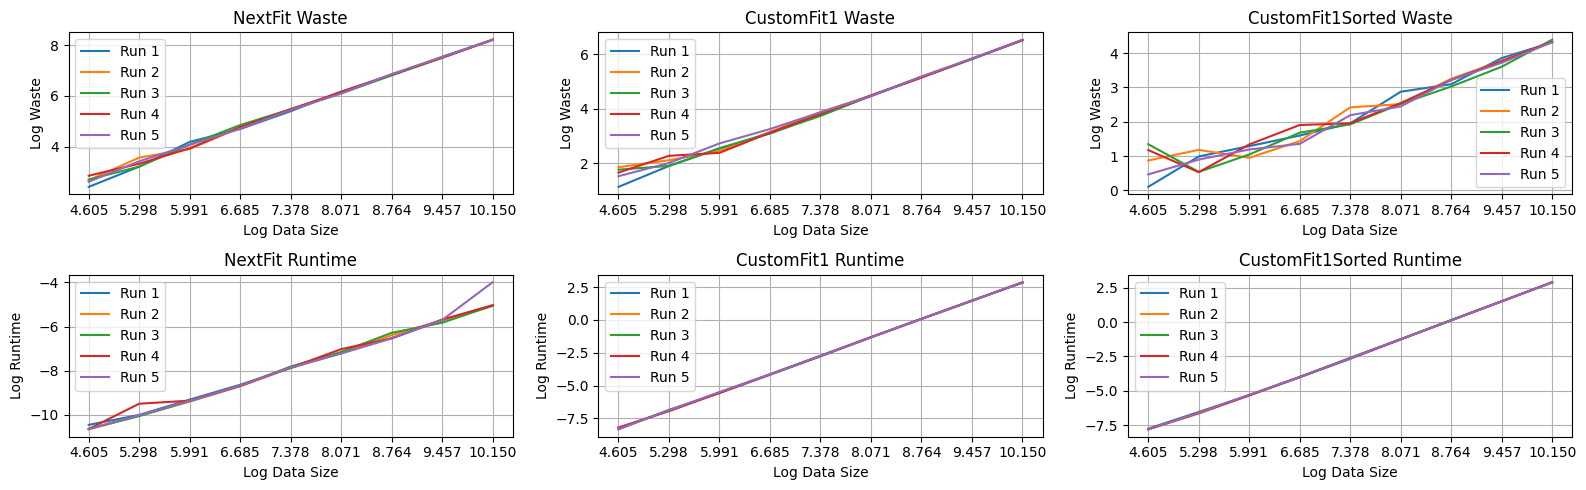

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(16, 5))
plottype(cf1, 'NextFit', 'Waste', axes[0,0])
plottype(cf1, 'CustomFit1', 'Waste', axes[0,1])
plottype(cf1, 'CustomFit1Sorted', 'Waste', axes[0,2])
plottype(cf1, 'NextFit', 'Runtime', axes[1,0])
plottype(cf1, 'CustomFit1', 'Runtime', axes[1,1])
plottype(cf1, 'CustomFit1Sorted', 'Runtime', axes[1,2])
plt.tight_layout()
plt.show()

In [50]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
nf_waste = np.array([14.229911, 28.558679, 56.627807, 115.816490, 233.217887, 458.747150, 928.486310, 1842.777196, 3691.390597])
cf1_waste = np.array([5.029911, 7.758679, 12.627807, 23.216490, 45.217887, 87.747150, 174.286310, 339.977196, 676.790597])
cf1_sorted_waste = np.array([2.429911, 2.358679, 3.227807, 5.016490, 8.217887, 13.347150, 23.686310, 42.377196, 76.390597])

log_data_sizes = np.log(data_sizes)
log_nf_waste = np.log(nf_waste)
log_cf1_waste = np.log(cf1_waste)
log_cf1_sorted_waste = np.log(cf1_sorted_waste)
X = sm.add_constant(log_data_sizes)

model_nf = sm.OLS(log_nf_waste, X).fit()
model_cf1 = sm.OLS(log_cf1_waste, X).fit()
model_cf1_sorted = sm.OLS(log_cf1_sorted_waste, X).fit()

print("Coefficients for NF:", model_nf.params)
print("Coefficients for CF1:", model_cf1.params)
print("Coefficients for CF1 Sorted:", model_cf1_sorted.params)

Coefficients for NF: [-1.96037817  1.00280427]
Coefficients for CF1: [-2.75303295  0.90233916]
Coefficients for CF1 Sorted: [-2.58959896  0.6593671 ]


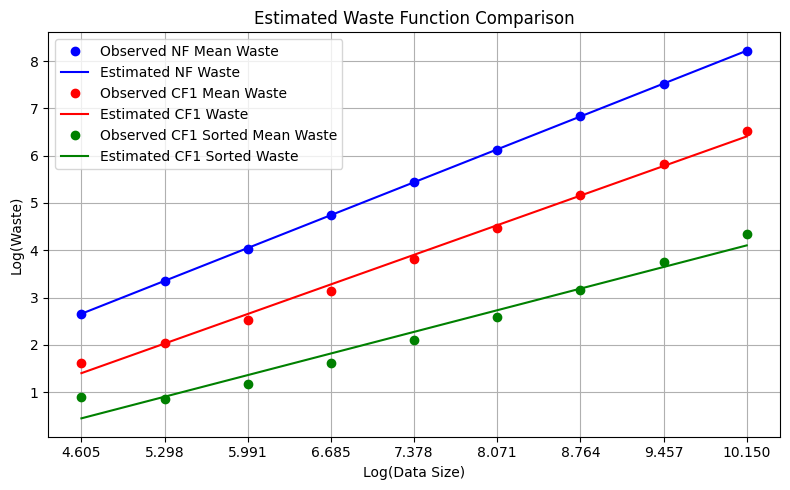

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(log_data_sizes, log_nf_waste, 'bo', label = 'Observed NF Mean Waste')
plt.plot(log_data_sizes, model_nf.fittedvalues, 'b-', label = 'Estimated NF Waste')
plt.plot(log_data_sizes, log_cf1_waste, 'ro', label = 'Observed CF1 Mean Waste')
plt.plot(log_data_sizes, model_cf1.fittedvalues, 'r-', label = 'Estimated CF1 Waste')
plt.plot(log_data_sizes, log_cf1_sorted_waste, 'go', label = 'Observed CF1 Sorted Mean Waste')
plt.plot(log_data_sizes, model_cf1_sorted.fittedvalues, 'g-', label = 'Estimated CF1 Sorted Waste')
plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('Estimated Waste Function Comparison')
plt.tight_layout()
plt.grid()
plt.show()

**NextFit(NF) Estimated Waste Function of n**: 
- $Log(NFWaste) = -1.9604 + 1.0028 log(n)$
- OR exponentiated: $NFWaste = 0.140 n^{1.0028}$

**CustomFit1(CF1) Estimated Waste Function of n**:
- $Log(CF1Waste) = -2.753 + 0.9023 log(n)$
- OR exponentiated: $CF1Waste = 0.0637 n^{0.9023}$

**CustomFit1Sorted Esxtimated Waste Function of n**:
- $Log(CF1SortedWaste) = -2.5896 + 0.6594 log(n)$
- OR exponentiated: $CF1SortedWaste = 0.07505 n^{0.6594}$

**NF Estimated Big-O**:
- $O(2n)= O(n)$ ???

#TODO

**CF1 Estimated Big-O**:
- $ ??? $

#TODO

**CF1 Sorted Big-O**:
- $ ??? $

#TODO

#### How CustomFit1 and CustomFit1Sorted compared to NextFit in waste and runtime:

As shown above, I used statsmodels package to run linear regressions on the observed mean wastes from NextFit, CustomFit1, and CustomFit1Sorted, thus allowing me to get accurate coefficients for the estimated functions of waste as a function of n or data size. Each equation has a negative intercept term, and a positive slope coefficient. Analyzing the log(waste) equations from above, we can see that NextFit has the largest slope of 1.0028, while both CustomFit1's have smaller slopes, indicating the improved performance in regard to waste. I want to focus on CustomFit1 here and compare it to NextFit because it did not use sorting so it feels like a fair comparison. This improvement in waste may be a result of the fact that CF1 sequentially scanned each bin from the start and had a more sophisticated threshold based placement strategy. The plot above shows the performance of the three matched up next to each other: NF performing worst, CF1 performing in between the others, and CF1Sorted performing the best. This is what I expected the results to look like. Comparing the average wastes across the various data sizes, CF1 appears to have one-third to one-quarter the average waste of NextFit and CF1Sorted has an even bigger reduction. On a side note, between CF1 and CF1Sorted, there is a large drop in slopes(0.9 to 0.65) and this goes to show the power of sorting the data before running the thresholding strategy, and how this can cause significant improvements. 

Looking at average run times across these three bin packing algorithms, I notice that runtimes are inversely correlated with waste performance. NextFit performed lightning quick on all data sizes only taking fractions of a second. CustomFit1 performed much slower in comparison to NextFit, especially in the larger data sizes. On smaller data sizes, CF1 had runtimes somewhat comparable to NextFit's, but as data got larger, its runtime slowed considerably: taking around 17 seconds on the 25600 data size. Lastly, CustomFit1Sorted had around the same runtimes performance as CF1, but it took a few fractions of a second longer, presumably due to the sorting with MergeSort. 

## CustomFit2 VS NextFit, FirstFit, BestFit
(Aaron)
#### Motivation
For CustomFit2, we did a group based binpacking using BestFit as our algorithm of choice. We first group the items in the list based on deterministic ranges and use BestFit on the grouped list. This a pseudo sort algorithm as it is similar to sorting. It groups items in ranges and the ranges are in descending order. This improves on BestFit, FirstFit, and NextFit.

### Functionality and Explanation


### Descriptive Statistics

In [52]:
cf2 = pd.read_csv("cf2_results.csv")
cf2['Algorithm'] = cf2['Algos'].apply(format_string)
cf2 = cf2.drop('Algos', axis=1)

In [53]:
# Stats on CustomFit2 vs nf,ff,bf
nf_results = cf2[cf2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
nf_results = nf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
nf_results = nf_results.rename(columns={'Waste':'NF Mean Waste', 'Runtime':'NF Mean Runtime'})

bf_results = cf2[cf2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
bf_results = bf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
bf_results = bf_results.rename(columns={'Waste':'BF Mean Waste', 'Runtime':'BF Mean Runtime'})

ff_results = cf2[cf2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
ff_results = ff_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
ff_results = ff_results.rename(columns={'Waste':'FF Mean Waste', 'Runtime':'FF Mean Runtime'})

cf2_results = cf2[cf2['Algorithm'].str.contains('CustomFit20|CustomFit21|CustomFit22|CustomFit23|CustomFit24')]
cf2_results = cf2_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf2_results = cf2_results.rename(columns={'Waste':'CF2 Mean Waste', 'Runtime':'CF2 Mean Runtime'})

merged_stats = nf_results.merge(cf2_results, on = 'Data Size').merge(bf_results, on='Data Size').merge(ff_results, on='Data Size')
merged_stats = merged_stats[['NF Mean Waste', 'FF Mean Waste','BF Mean Waste','CF2 Mean Waste', 'NF Mean Runtime', 'FF Mean Waste','BF Mean Runtime','CF2 Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats)

           NF Mean Waste  FF Mean Waste  BF Mean Waste  CF2 Mean Waste  NF Mean Runtime  FF Mean Waste  BF Mean Runtime  CF2 Mean Runtime
Data Size                                                                                                                                
100            14.229911       4.429911       3.629911        2.629911         0.000046       4.429911         0.000577          0.000633
200            28.558679       6.758679       4.558679        2.758679         0.000060       6.758679         0.001717          0.002146
400            56.627807       8.427807       6.427807        1.827807         0.000118       8.427807         0.006838          0.011361
800           115.816490      14.016490       9.216490        1.816490         0.000211      14.016490         0.031300          0.036346
1600          233.217887      20.817887      15.817887        2.417887         0.000483      20.817887         0.083504          0.119639
3200          458.747150      36.1

#### Plotting Waste and Runtime on Log-Log Scale

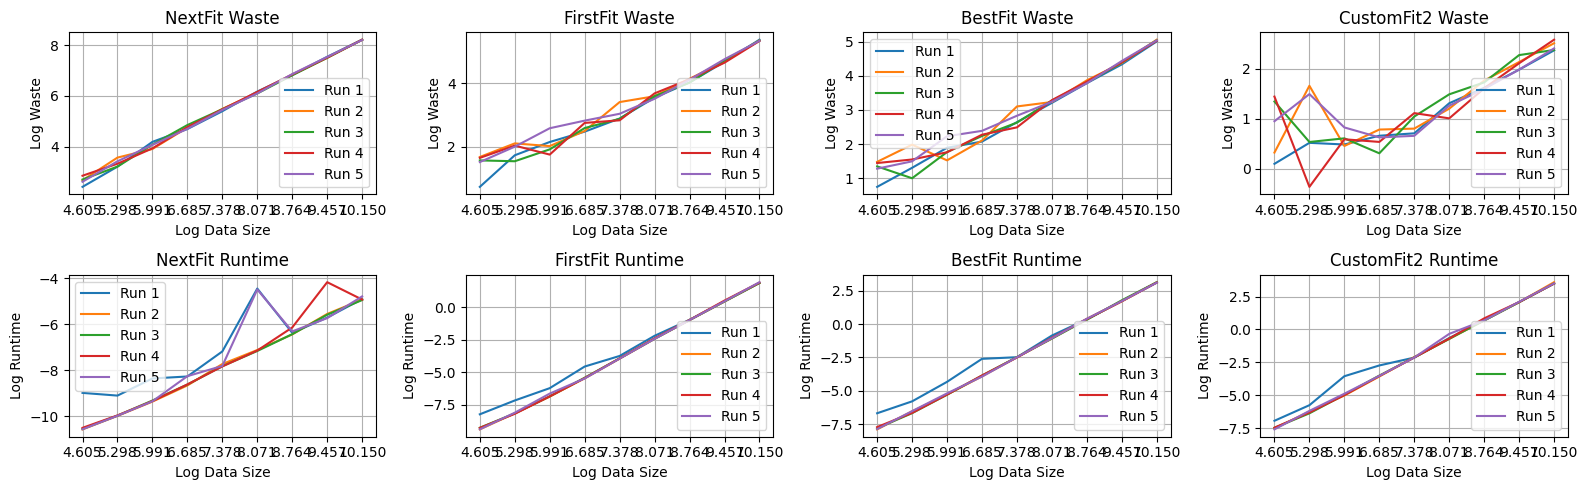

In [54]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
plottype(cf2, 'NextFit', 'Waste', axes[0,0])
plottype(cf2, 'FirstFit','Waste', axes[0,1])
plottype(cf2, 'BestFit', 'Waste', axes[0,2])
plottype(cf2, 'CustomFit2', 'Waste', axes[0,3])
plottype(cf2, 'NextFit', 'Runtime', axes[1,0])
plottype(cf2, 'FirstFit','Runtime', axes[1,1])
plottype(cf2, 'BestFit', 'Runtime', axes[1,2])
plottype(cf2, 'CustomFit2', 'Runtime', axes[1,3])
plt.tight_layout()
plt.show()

In [62]:
# Can use same X and data size array as above

bf_waste=np.asarray(bf_results['BF Mean Waste'])
ff_waste=np.asarray(ff_results['FF Mean Waste'])
nf_waste=np.asarray(nf_results['NF Mean Waste'])
cf2_waste=np.asarray(cf2_results['CF2 Mean Waste'])


log_bf_waste=np.log(bf_waste)
log_ff_waste=np.log(ff_waste)
log_nf_waste = np.log(nf_waste)
log_cf2_waste = np.log(cf2_waste)

model_nf = sm.OLS(log_nf_waste, X).fit()
model_cf2 = sm.OLS(log_cf2_waste, X).fit()
model_bf = sm.OLS(log_bf_waste, X).fit()
model_ff = sm.OLS(log_ff_waste, X).fit()

print("Coefficients for NF:", model_nf.params)
print("Coefficients for BF Sorted:", model_bf.params)
print("Coefficients for FF Sorted:", model_ff.params)
print("Coefficients for CF2:", model_cf2.params)

Coefficients for NF: [-1.96037819  1.00280427]
Coefficients for BF Sorted: [-2.1561605  0.685797 ]
Coefficients for FF Sorted: [-1.86602971  0.68846979]
Coefficients for CF2: [-0.84324282  0.28820274]


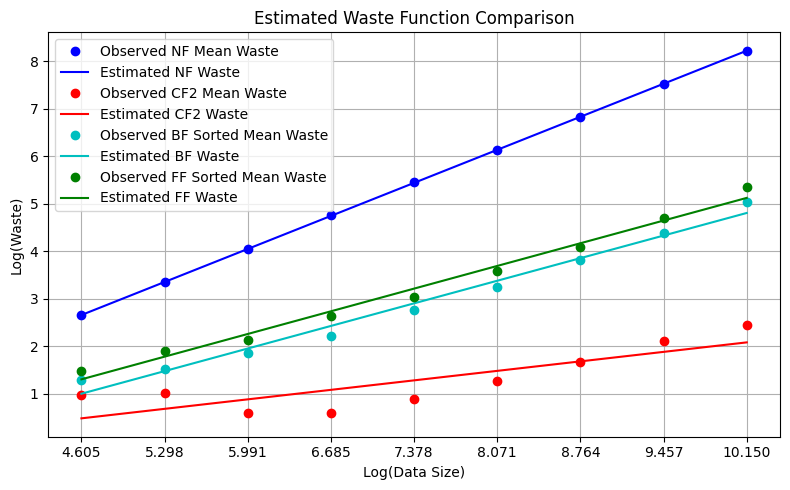

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(log_data_sizes, log_nf_waste, 'bo', label = 'Observed NF Mean Waste')
plt.plot(log_data_sizes, model_nf.fittedvalues, 'b-', label = 'Estimated NF Waste')

plt.plot(log_data_sizes, log_cf2_waste, 'ro', label = 'Observed CF2 Mean Waste')
plt.plot(log_data_sizes, model_cf2.fittedvalues, 'r-', label = 'Estimated CF2 Waste')

plt.plot(log_data_sizes, log_bf_waste, 'co', label = 'Observed BF Sorted Mean Waste')
plt.plot(log_data_sizes, model_bf.fittedvalues, 'c-', label = 'Estimated BF Waste')

plt.plot(log_data_sizes, log_ff_waste, 'go', label = 'Observed FF Sorted Mean Waste')
plt.plot(log_data_sizes, model_ff.fittedvalues, 'g-', label = 'Estimated FF Waste')

plt.xlabel('Log(Data Size)')
plt.ylabel('Log(Waste)')
plt.xticks(log_data_sizes)
plt.legend()
plt.title('Estimated Waste Function Comparison')
plt.tight_layout()
plt.grid()
plt.show()